In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, InputLayer, Activation, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import cv2
import random
import os
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
import random


In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

In [ ]:
data_dir = "/content/drive/My Drive/TF3 C3 W1 Data/"

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
VGG19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in VGG19.layers:
    layer.trainable = False

In [ ]:
folders = glob('/Users/rutujajadhav/Desktop/r/Dataset/Train/*')
folders

['/Users/rutujajadhav/Desktop/r/Dataset/Train/Parasite',
 '/Users/rutujajadhav/Desktop/r/Dataset/Train/Uninfected']

In [ ]:
PARA_DIR = "/Users/rutujajadhav/Desktop/r/Dataset/Train/Parasite/"
UNIF_DIR =  "/Users/rutujajadhav/Desktop/r/Dataset/Train/Uninfected/"

In [ ]:
Pimages = os.listdir(PARA_DIR)
Nimages = os.listdir(UNIF_DIR)

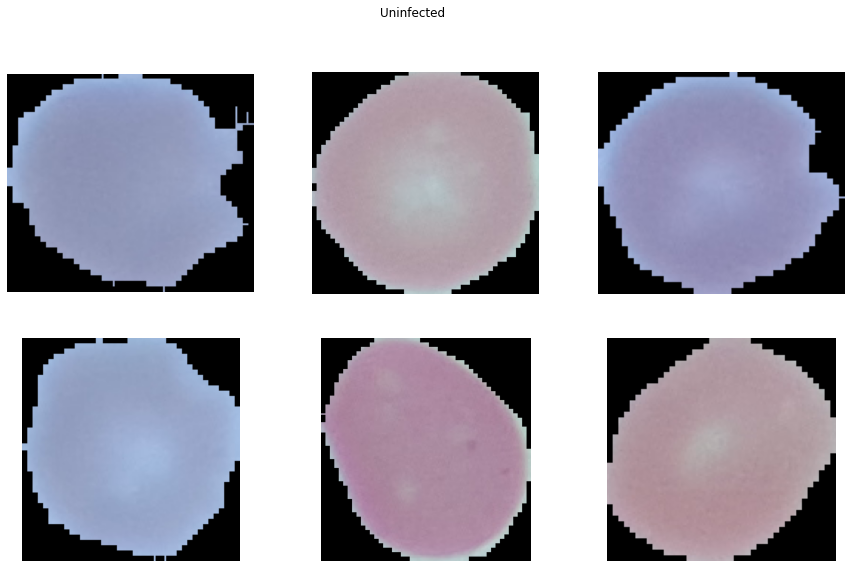

In [ ]:
sample_normal = random.sample(Nimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('/Users/rutujajadhav/Desktop/r/Dataset/Train/Uninfected/'+sample_normal[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Uninfected')
plt.show()

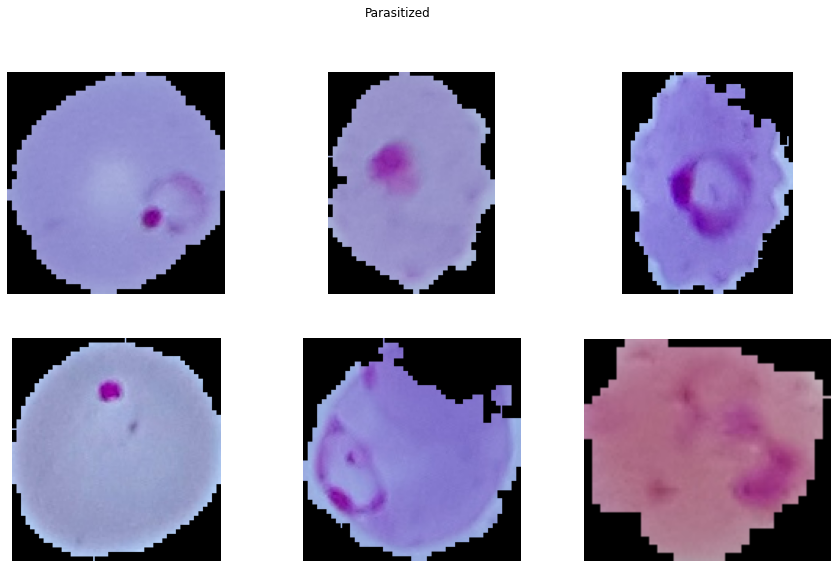

In [ ]:
sample_parasite = random.sample(Pimages,6)
f,ax = plt.subplots(2,3,figsize=(15,9))

for i in range(0,6):
    im = cv2.imread('/Users/rutujajadhav/Desktop/r/Dataset/Train/Parasite/'+sample_parasite[i])
    ax[i//3,i%3].imshow(im)
    ax[i//3,i%3].axis('off')
f.suptitle('Parasitized')
plt.show()

In [ ]:
x=Flatten()(VGG19.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=VGG19.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/Users/rutujajadhav/Desktop/r/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/Users/rutujajadhav/Desktop/r/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
13/13 [==============================] - 87s 7s/step - loss: 1.6802 - accuracy: 0.5577 - val_loss: 1.0150 - val_accuracy: 0.3657
Epoch 2/20
13/13 [==============================] - 85s 7s/step - loss: 0.8961 - accuracy: 0.6250 - val_loss: 0.9182 - val_accuracy: 0.4776
Epoch 3/20
13/13 [==============================] - 86s 7s/step - loss: 0.4987 - accuracy: 0.7452 - val_loss: 0.5162 - val_accuracy: 0.7239
Epoch 4/20
13/13 [==============================] - 76s 6s/step - loss: 0.3760 - accuracy: 0.8341 - val_loss: 0.5372 - val_accuracy: 0.7090
Epoch 5/20
13/13 [==============================] - 78s 6s/step - loss: 0.3350 - accuracy: 0.8558 - val_loss: 0.4039 - val_accuracy: 0.8134
Epoch 6/20
13/13 [==============================] - 86s 7s/step - loss: 0.3023 - accuracy: 0.8870 - val_loss: 0.3977 - val_accuracy: 0.8657
Epoch 7/20
13/13 [==============================] - 84s 6s/step - loss: 0.2806 - accuracy: 0.9038 - val_loss: 0.3894 - val_accuracy: 0.8358
Epoch 8/20
13/13 [==

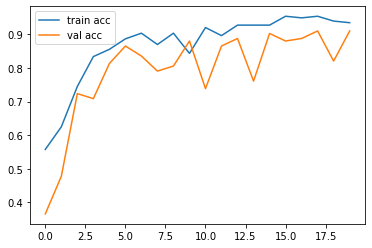

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('model2_vgg19.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[9.9819463e-01, 1.8054114e-03],
       [9.9945599e-01, 5.4407300e-04],
       [9.9471539e-01, 5.2845511e-03],
       [5.5716217e-01, 4.4283780e-01],
       [1.7551520e-01, 8.2448477e-01],
       [1.8165258e-01, 8.1834745e-01],
       [2.5615332e-01, 7.4384671e-01],
       [4.9283889e-01, 5.0716102e-01],
       [2.9270124e-01, 7.0729876e-01],
       [4.6315503e-01, 5.3684497e-01],
       [9.9640012e-01, 3.5998535e-03],
       [1.5682185e-01, 8.4317815e-01],
       [2.6788801e-01, 7.3211199e-01],
       [8.3348185e-01, 1.6651815e-01],
       [9.0849304e-01, 9.1506958e-02],
       [9.9952936e-01, 4.7067297e-04],
       [9.4206548e-01, 5.7934463e-02],
       [9.2250752e-01, 7.7492490e-02],
       [9.9807358e-01, 1.9263531e-03],
       [9.0530747e-01, 9.4692580e-02],
       [9.9999511e-01, 4.8848628e-06],
       [7.7909660e-01, 2.2090338e-01],
       [9.5817727e-01, 4.1822754e-02],
       [4.7147498e-01, 5.2852499e-01],
       [6.4079052e-01, 3.5920948e-01],
       [4.2662790e-01, 5.

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model2_vgg19.h5')

In [ ]:
img=image.load_img('/Users/rutujajadhav/Desktop/r/Dataset/Test/Uninfected/2.png',target_size=(224,224))

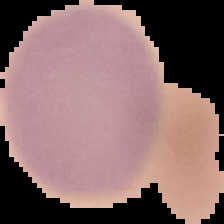

In [ ]:
img

In [ ]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

array([[0.12515293, 0.8748471 ]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")
  

Uninfected
